In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
sns.set(rc={'figure.figsize':(11,8)})

In [2]:
token = "" # @param
version = "5.131" # @param
domain = "imct_fefu" # @param

In [3]:
response = requests.get(
    'https://api.vk.com/method/wall.get',
    params={
        'access_token': token,
        'v': version,
        'domain': domain,
        'extended': 1,
        'count': 99999
    }
)

In [4]:
posts = response.json()['response']['items']

In [5]:
profiles = []
comments = []
groups = []

In [6]:
for post in posts:
    # fetch comments
    response = requests.get(
        'https://api.vk.com/method/wall.getComments',
        params={
            'access_token': token,
            'v': version,
            'count': 99999,
            'post_id': post["id"],
            "owner_id": post["owner_id"],
            "extended": 1,
            "need_likes": 1,
            "thread_items_count": 10
        }
    )
    response_data = response.json()["response"]
    # save profiles
    profiles += response_data["profiles"]

    # save groups
    groups += response_data["groups"]
    # save comments
    comments += response_data["items"]
    for item in response_data["items"]:
        comments += item['thread']['items']
    post["comments_items"] = response_data["items"]

    # fetch likes
    # TODO. deprecated

In [7]:
data = []
for post in posts:
    item = [
        post["date"],
        post.get("edited") or None,
        post["text"],
        post["likes"]["count"],
        post.get("likes_items") or [],
        post["comments"]["count"],
        post.get("comments_items") or [],
        post["views"]["count"],
        post.get("attachments") or []
    ]
    data.append(item)

In [8]:
posts_df = pd.DataFrame(
    data,
    columns=[
        "date", "edited", "text", "likes_count", "likes_items", "comments_count", "comments_items",
        "views_count", "attachments"
    ]
)
posts_df['date'] = pd.to_datetime(posts_df['date'],unit='s').dt.tz_localize('Asia/Vladivostok')
posts_df['edited'] = pd.to_datetime(posts_df['edited'],unit='s').dt.tz_localize('Asia/Vladivostok')
posts_df

date                    edited  \
0  2022-06-16 05:47:58+10:00 2022-06-16 05:48:38+10:00   
1  2022-06-15 08:17:26+10:00 2022-06-15 08:18:03+10:00   
2  2022-06-12 01:12:14+10:00 2022-06-12 05:16:19+10:00   
3  2022-06-11 00:00:00+10:00                       NaT   
4  2022-06-10 01:02:24+10:00 2022-06-10 01:19:18+10:00   
..                       ...                       ...   
92 2021-10-18 07:12:54+10:00                       NaT   
93 2021-10-17 05:39:05+10:00                       NaT   
94 2021-10-17 02:48:41+10:00 2021-10-17 05:39:48+10:00   
95 2021-09-08 00:00:00+10:00                       NaT   
96 2021-09-07 23:45:00+10:00                       NaT   

                                                 text  likes_count  \
0   –õ–µ—Ç–Ω—è—è —à–∫–æ–ª–∞ —Ñ–æ–Ω–¥–∞ ¬´–ò–Ω—Å—Ç–∏—Ç—É—Ç "–í–µ–≥–∞"¬ª. \n \nC 4...            8   
1   –ù–∞–¥–µ–µ–º—Å—è, —Ç—ã —É–∂–µ –∑–∞—Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä–æ–≤–∞–ª—Å—è –Ω–∞ –≤–µ–ª–∏–∫–∏–π ...           10   
2   –¢—É—Ä–Ω–∏—Ä—ã –ø–æ –∏–≥—Ä–∞–º –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç, —á—Ç–æ –∏–≥—Ä–∞—Ç—å –≤ –ò–ú–ö–¢...           19   
3   VI –í—Å–µ—Ä–æ—Å—Å–∏–π—Å–∫–∞—è –∫–æ–Ω—Ñ–µ—Ä–µ–Ω—Ü–∏—è —Å –º–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω—ã–º —É...            9   
4   –ü–æ–º–Ω–∏—à—å, –°–±–µ—Ä [https://vk.com/imct_fefu?w=wall...           14   
..                                                ...          ...   
92  –î–∞–ª—å–Ω–µ–≤–æ—Å—Ç–æ—á–Ω—ã–π —Å—Ç–∞—Ä—Ç ‚Äì –ø—Ä–æ–≥—Ä–∞–º–º–∞, –∫–æ—Ç–æ—Ä–∞—è —Å—Ç–∞...            4   
93  –£ C–±–µ—Ä–∞ –µ—Å—Ç—å –µ–∂–µ–≥–æ–¥–Ω—ã–π AI Journey Contest ‚Äî –º–∞...            4   
94  –ü–æ—Å–≤—è—â–µ–Ω–∏–µ –≤ —Å—Ç—É–¥–µ–Ω—Ç—ã –¥–ª—è –ø–µ—Ä–≤–æ–∫—É—Ä—Å–Ω–∏–∫–æ–≤ –ò–ú–ö–¢ ...           35   
95  –¢–µ, –∫—Ç–æ –ø–æ–º–æ–≥–∞—é—Ç –Ω–∞—á–∞—Ç—å ‚Äî –Ω–∞—Å—Ç–∞–≤–Ω–∏–∫–∏ –ò–ú–ö–¢\n\n–ï...           20   
96  –ü—Ä–∏–≤–µ—Ç! –ù–æ–≤—ã–π –∏–Ω—Å—Ç–∏—Ç—É—Ç ‚Äî –Ω–æ–≤–∞—è –≥—Ä—É–ø–ø–∞, –Ω–æ–≤—ã–µ —É...           17   

   likes_items  comments_count  \
0           []               4   
1           []               0   
2           []               7   
3           []               0   
4           []               3   
..         ...             ...   
92          []               0   
93          []               0   
94          []               0   
95          []               0   
96          []               0   

                                       comments_items  views_count  \
0   [{'id': 247, 'from_id': 224681507, 'date': 165...          316   
1                                                  []          399   
2   [{'id': 235, 'from_id': 432019281, 'date': 165...          810   
3                                                  []          452   
4   [{'id': 229, 'from_id': 283841494, 'date': 165...          613   
..                                                ...          ...   
92                                                 []         1208   
93                                                 []         1004   
94                                                 []         1582   
95                                                 []         2104   
96                                                 []         1461   

                                          attachments  
0   [{'type': 'photo', 'photo': {'album_id': -7, '...  
1   [{'type': 'photo', 'photo': {'album_id': -7, '...  
2   [{'type': 'photo', 'photo': {'album_id': -7, '...  
3   [{'type': 'photo', 'photo': {'album_id': -7, '...  
4   [{'type': 'photo', 'photo': {'album_id': -7, '...  
..                                                ...  
92  [{'type': 'photo', 'photo': {'album_id': -7, '...  
93  [{'type': 'photo', 'photo': {'album_id': -7, '...  
94  [{'type': 'photo', 'photo': {'album_id': -7, '...  
95  [{'type': 'photo', 'photo': {'album_id': -7, '...  
96  [{'type': 'photo', 'photo': {'album_id': -7, '...  

[97 rows x 9 columns]

In [9]:
profiles_df = pd.DataFrame(
    profiles,
    columns=[
        "id", "last_name", "first_name"
    ]
).groupby('id').first().reset_index()
profiles_df

id     last_name  first_name
0     6303325   Zagumyonnov      Alexey
1     7660555      Al-Saraf      Artyom
2   145662921    Stepanenko      Arkady
3   150609591       Maximov       Pavel
4   151531982     Reshetnev      Nikita
5   176509188        Ipatov      Georgy
6   180190869     Abashkina     Natasha
7   181201565       Dyatlov      Artyom
8   203603517         Kolin      Nikita
9   206458372       Grinyov         Max
10  213261798  Korinetskaya       Yulia
11  213851167      Elprimov        Dima
12  222647121        Sereda       Semen
13  224681507   Varfolomeev      Andrey
14  247227509         Surop       Denis
15  265435051         Grats    Valentin
16  283841494       Korobov        Vlad
17  295028917       Maximov       Artem
18  300468923     Muromtsev        Ilya
19  300901052        Belous       Irina
20  303156488     Savransky        Ilya
21  317384613        Avilov        Ilya
22  318633657        Redrov        Ivan
23  329414568      Stepanov        Vlad
24  335668836       Kazanov      Nikita
25  366108093      Belousov        Egor
26  383446997       Makovey      Nikita
27  405233033           Kim   Alexander
28  427059695      Kurasova      Nastya
29  432019281    Gorbatenko        Dima
30  453334071     Krutitsya       Danil
31  482410420       Mankova      Polina
32  521060984   Gordunovsky  Vyacheslav
33  539372049   Ovezmuradov       Kerim
34  554945804       Morozov       Ignat
35  567222532  Vasilevskaya      Ioanna
36  586134563       Lantsov        Igor
37  600535282     Dremlyuga       Roman
38  649598897       Baishev      Evgeny
39  679967485          Lava       Yasha

In [10]:
groups_df = pd.DataFrame(
    groups,
    columns=[
        "id", "name"
    ]
).groupby('id').first().reset_index()
groups_df

id       name
0  206944280  –ò–ú–ö–¢ –î–í–§–£

In [11]:
comments_df = pd.DataFrame(
    comments,
    columns=[
        "id", "text", "from_id", "likes", "post_id"
    ]
)
#comments_df['likes'] = comments_df['likes'].map(lambda x: print(type(x)))
comments_df['likes'] = comments_df['likes'].map(lambda x: x["count"] if type(x) == dict else 0)
comments_df

id                                               text    from_id  likes  \
0   247                                                123  224681507      0   
1   248                                               321? -206944280      0   
2   249                     [club206944280|–ò–ú–ö–¢ –î–í–§–£], 456  224681507      0   
3   251                                –õ–∞–¥–Ω–æ, –≤—ã –ø–æ–±–µ–¥–∏–ª–∏. -206944280      0   
4   235                –ö–æ–≥–¥–∞ –±—É–¥–µ—Ç —Ç—É—Ä–Ω–∏—Ä –ø–æ Clash Royale?  432019281      4   
..  ...                                                ...        ...    ...   
78   67                                     –°–¥–µ–ª–∞–Ω–æ –≤ –ò–ú–ö–¢    6303325      5   
79   68                                     –°–¥–µ–ª–∞–Ω–æ –≤ –ò–ú–ö–¢    6303325      0   
80   18  –ü–æ–ø—Ä–∞–≤–∫–∞ –≤ –ø—É–Ω–∫—Ç–µ –ø—Ä–æ —Ä–∞–±–æ—Ç—É –º–µ–¥–ø—É–Ω–∫—Ç–∞. –ú–æ–∂–µ—Ç–µ...  567222532      0   
81   13                                           –¢–∞ –∑–∞ —à–æ  453334071     11   
82   15                                                    -206944280      0   

    post_id  
0       245  
1       245  
2       245  
3       245  
4       234  
..      ...  
78       66  
79       58  
80       17  
81       12  
82       12  

[83 rows x 5 columns]

In [12]:
#df.to_csv('output.csv', columns=df.columns)
#from google.colab import files
#files.download("output.csv")

In [22]:
posts_df.to_csv('data/posts.csv', sep=',')
profiles_df.to_csv('data/profiles.csv', sep=',')
groups_df.to_csv('data/groups.csv', sep=',')
comments_df.to_csv('data/comments.csv', sep=',')

In [13]:
scalars_values_by_date = posts_df.copy()
scalars_values_by_date['date'] = scalars_values_by_date['date'].map(lambda x: x.date())
scalars_values_by_date = scalars_values_by_date.groupby('date').agg({
    'likes_count': ['sum'], 
    'comments_count': ['sum'],
    'views_count': ['sum']
}).reset_index()
scalars_values_by_date.columns = ["date", "likes_count", "comment_count", "views_count"]
scalars_values_by_date

date  likes_count  comment_count  views_count
0   2021-09-07           17              0         1461
1   2021-09-08           20              0         2104
2   2021-10-17           39              0         2586
3   2021-10-18            4              0         1208
4   2021-11-03           28              2         1970
..         ...          ...            ...          ...
69  2022-06-10           14              3          613
70  2022-06-11            9              0          452
71  2022-06-12           19              7          810
72  2022-06-15           10              0          399
73  2022-06-16            8              4          316

[74 rows x 4 columns]

In [14]:
scalars_values_by_date

date  likes_count  comment_count  views_count
0   2021-09-07           17              0         1461
1   2021-09-08           20              0         2104
2   2021-10-17           39              0         2586
3   2021-10-18            4              0         1208
4   2021-11-03           28              2         1970
..         ...          ...            ...          ...
69  2022-06-10           14              3          613
70  2022-06-11            9              0          452
71  2022-06-12           19              7          810
72  2022-06-15           10              0          399
73  2022-06-16            8              4          316

[74 rows x 4 columns]

# –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –ø–æ—Å—Ç–∞–º

<AxesSubplot:xlabel='date', ylabel='comment_count'>

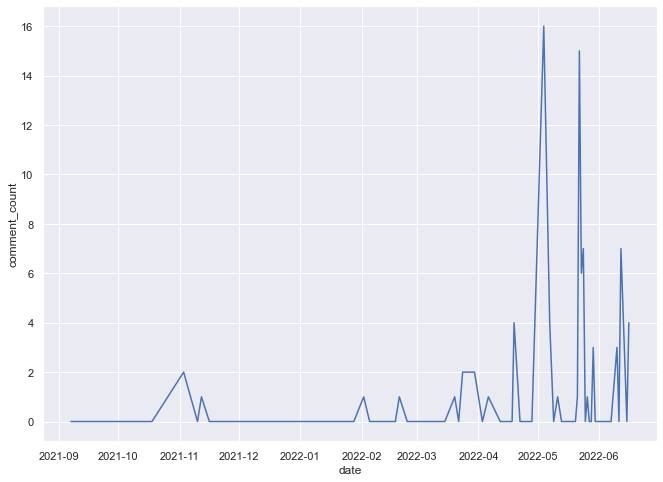

In [15]:
sns.lineplot(data=scalars_values_by_date, x="date", y="comment_count")

<AxesSubplot:xlabel='date', ylabel='likes_count'>

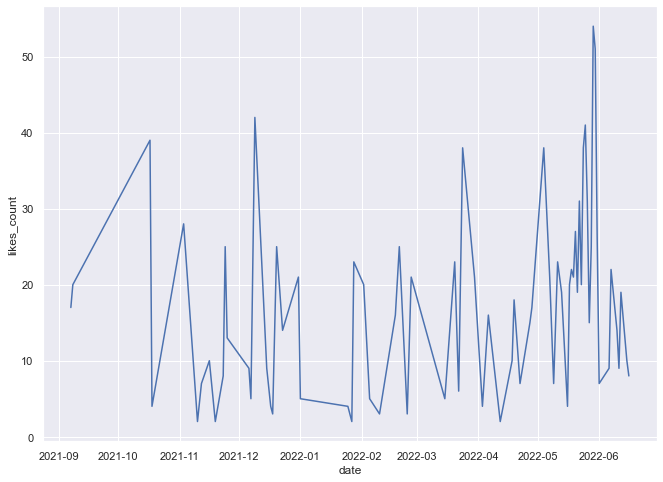

In [16]:
sns.lineplot(data=scalars_values_by_date, x="date", y="likes_count")

# –¢–æ–ø 10 –ø–æ—Å—Ç–æ–≤

<AxesSubplot:xlabel='date', ylabel='views_count'>

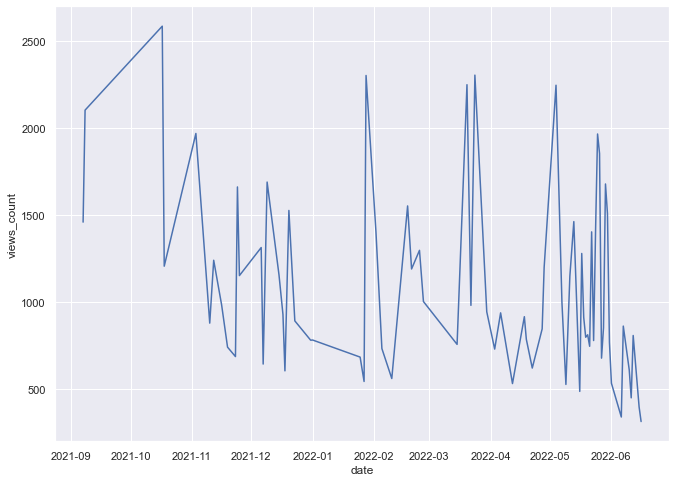

In [17]:
sns.lineplot(data=scalars_values_by_date, x="date", y="views_count")

In [18]:
posts_top_10 = posts_df.sort_values(by=['likes_count', 'views_count'], ascending=[False, False])
posts_top_10

date                    edited  \
49 2022-03-24 07:00:02+10:00 2022-03-24 07:05:45+10:00   
39 2022-05-04 09:09:17+10:00                       NaT   
78 2021-12-09 05:00:02+10:00                       NaT   
94 2021-10-17 02:48:41+10:00 2021-10-17 05:39:48+10:00   
13 2022-05-29 00:00:00+10:00                       NaT   
..                       ...                       ...   
75 2021-12-17 02:44:48+10:00                       NaT   
74 2021-12-17 02:47:09+10:00 2021-12-17 02:48:09+10:00   
57 2022-02-24 03:02:21+10:00                       NaT   
60 2022-02-18 08:52:29+10:00                       NaT   
32 2022-05-17 02:17:07+10:00                       NaT   

                                                 text  likes_count  \
49  –ù–∞ —Å–≤—è–∑–∏ —Å–Ω–æ–≤–∞ IMCTech! \n \n–ú—ã –∫ –≤–∞–º —Å –æ—Ç–ª–∏—á–Ω...           38   
39  –¢—É—Ä–Ω–∏—Ä –ø–æ –∏–≥—Ä–∞–º –æ—Ç –ò–ú–ö–¢\n\n14 –º–∞—è —É –Ω–∞—Å –ø—Ä–æ–π–¥—ë...           38   
78  –•–æ–π-—Ö–æ–π-—Ö–æ–π, –≤—Å–µ–º –ù–æ–≤–æ—Ñ–µ—Å—Ç \n \n25 –¥–µ–∫–∞–±—Ä—è –º—ã ...           38   
94  –ü–æ—Å–≤—è—â–µ–Ω–∏–µ –≤ —Å—Ç—É–¥–µ–Ω—Ç—ã –¥–ª—è –ø–µ—Ä–≤–æ–∫—É—Ä—Å–Ω–∏–∫–æ–≤ –ò–ú–ö–¢ ...           35   
13  –¢—É—Ä–Ω–∏—Ä –ø–æ –∏–≥—Ä–∞–º –æ—Ç –ò–ú–ö–¢: —á–µ—Å—Ç–≤—É–µ–º –ø–æ–±–µ–¥–∏—Ç–µ–ª–µ–π ...           30   
..                                                ...          ...   
75  –£–≤–∞–∂–∞–µ–º—ã–µ —Å—Ç—É–¥–µ–Ω—Ç—ã-—É—á–∞—Å—Ç–Ω–∏–∫–∏ –æ–ª–∏–º–ø–∏–∞–¥—ã ¬´–Ø - –ø—Ä...            2   
74  –ö—Å—Ç–∞—Ç–∏ –æ–± –æ–ª–∏–º–ø–∏–∞–¥–µ, —Ä–µ–±—è—Ç–∞ –ø–æ–¥–≥–æ—Ç–æ–≤–∏–ª–∏ –¥–ª—è —É—á...            2   
57  –£—Ñ–∏–º—Å–∫–∏–π –≥–æ—Å—É–¥–∞—Ä—Å—Ç–≤–µ–Ω–Ω—ã–π –Ω–µ—Ñ—Ç—è–Ω–æ–π —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏–π ...            1   
60  –ó–∞–ø—É—Å—Ç–∏ —Å–≤–æ–π –±–∏–∑–Ω–µ—Å –≤–º–µ—Å—Ç–µ —Å–æ –°–ë–ï–†–æ–º ‚Äì –ª—É—á—à–∏–º ...            1   
32                                                               1   

   likes_items  comments_count  \
49          []               2   
39          []              16   
78          []               0   
94          []               0   
13          []               1   
..         ...             ...   
75          []               0   
74          []               0   
57          []               0   
60          []               0   
32          []               0   

                                       comments_items  views_count  \
49  [{'id': 84, 'from_id': 6303325, 'date': 164811...         2305   
39  [{'id': 109, 'from_id': 224681507, 'date': 165...         2247   
78                                                 []         1076   
94                                                 []         1582   
13  [{'id': 215, 'from_id': 586134563, 'date': 165...          893   
..                                                ...          ...   
75                                                 []          534   
74                                                 []          397   
57                                                 []          685   
60                                                 []          613   
32                                                 []          505   

                                          attachments  
49  [{'type': 'photo', 'photo': {'album_id': -7, '...  
39  [{'type': 'photo', 'photo': {'album_id': -7, '...  
78  [{'type': 'photo', 'photo': {'album_id': -7, '...  
94  [{'type': 'photo', 'photo': {'album_id': -7, '...  
13  [{'type': 'album', 'album': {'created': 165330...  
..                                                ...  
75  [{'type': 'photo', 'photo': {'album_id': -7, '...  
74                                                 []  
57  [{'type': 'video', 'video': {'access_key': 'f8...  
60  [{'type': 'photo', 'photo': {'album_id': -7, '...  
32                                                 []  

[97 rows x 9 columns]

# –¢–æ–ø –∫–æ–º–µ–Ω—Ç—ã

In [19]:
comments_df_merged = pd.merge(comments_df, profiles_df, left_on="from_id", right_on="id", how="left").sort_values(by=['likes'], ascending=[False])

In [20]:
comments_df_merged

id_x                                               text    from_id  likes  \
20   197  –õ—É—á—à–µ–µ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –≤ –≥–∞–ª–∞–∫—Ç–∏–∫–µ. \n\n–Ø –∑–∞ –æ–¥–∏–Ω ...  329414568     24   
16   215                     –ü–∞—à–∞ –ª—É—á—à–∏–π, –Ω–µ —Å–æ–º–Ω–µ–≤–∞–ª—Å—è!!!!  586134563     13   
81    13                                           –¢–∞ –∑–∞ —à–æ  453334071     11   
32   167                                    –ò–°–ò–¢ - –æ–≥–æ–Ω—å üî•üñ§  317384613      9   
31   166                                     –ò–°–ò–¢ - –æ–≥–æ–Ω—å üî•  145662921      9   
..   ...                                                ...        ...    ...   
52   109                              –≥–æ —Ç—É—Ä–∏–∫ –ø–æ hl2 dm :)  224681507      0   
53   111  –ù–∞–¥–æ –ø—Ä–∏—Ö–æ–¥–∏—Ç—å —Å–æ —Å–≤–æ–µ–π –∫–æ–º–∞–Ω–¥–æ–π –∏–ª–∏ —Ç–∞–º –±—É–¥–µ—Ç...  247227509      0   
54   112          –©–∞ –±—ã —Ç—É—Ä–Ω–∏—Ä—ã –ø–æ –º–µ—Ä—Ç–≤—ã–º –∏–≥—Ä–∞–º —É—Å—Ç—Ä–∞–∏–≤–∞—Ç—å  554945804      0   
55   123  –ê –∫–∞–∫–∏–µ —Å—É—Ä—Å-–ø–æ—Ä—Ç—ã –¥–ª—è —Ç–µ—Ö –∏–ª–∏ –∏–Ω—ã—Ö –∏–≥—Ä? –£ Q3 ...  150609591      0   
82    15                                                    -206944280      0   

    post_id         id_y    last_name first_name  
20      191  329414568.0     Stepanov       Vlad  
16      214  586134563.0      Lantsov       Igor  
81       12  453334071.0    Krutitsya      Danil  
32      162  317384613.0       Avilov       Ilya  
31      162  145662921.0   Stepanenko     Arkady  
..      ...          ...          ...        ...  
52      108  224681507.0  Varfolomeev     Andrey  
53      108  247227509.0        Surop      Denis  
54      108  554945804.0      Morozov      Ignat  
55      108  150609591.0      Maximov      Pavel  
82       12          NaN          NaN        NaN  

[83 rows x 8 columns]